In [4]:
import torch

torch.__version__

# torch.cuda.set_device(0)
torch.cuda.is_available()

False

## To check out all the arithmetic operations 
 [see](https://pytorch.org/docs/stable/torch.html "link here")

In [5]:
# https://docs.microsoft.com/en-us/learn/modules/intro-machine-learning-pytorch/2-tensors

%matplotlib inline

In [6]:
import torch
import numpy as np

### Initializing a Tensor

In [7]:
# from the data

data = [[1, 2],[3, 4]]
type(data)
x_data = torch.tensor(data)
(x_data)

tensor([[1, 2],
        [3, 4]])

In [8]:
# from numpy array

np_array = np.array(data)
np_array
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [9]:
# from another tensor

x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")


Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4016, 0.4476],
        [0.1607, 0.3987]]) 



In [10]:
# With random or constant values

shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.0039, 0.9061, 0.0921],
        [0.3670, 0.9354, 0.3368]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [11]:
# Tensor attributes
tensor = torch.rand(3,4)
# print(dir(tensor))

In [12]:
torch.cuda.is_available()

False

In [13]:
torch.cuda.is_initialized()

False

In [14]:
torch.__version__
torch.cuda.device_count()

0

In [15]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [16]:
# joining tensors

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [17]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [18]:
# Single-element tensors

agg = tensor.sum()
agg_item = agg.item()  
print(agg_item, type(agg_item))


12.0 <class 'float'>


In [19]:
# not recommended use of in-place operation

print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [20]:
# tensor to numpy

t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

print("A change in tensor will reflect in numpy.")
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
A change in tensor will reflect in numpy.
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [21]:
np.add(1,n, out=n)
n

array([3., 3., 3., 3., 3.], dtype=float32)

In [22]:
dtype = torch.float
device = torch.device("cpu")
device = torch.device("cuda:0")  # Uncomment this to run on GPU


In [23]:
# Load data with pytorch datasets and Dataloaders
# data source: https://pytorch.org/vision/stable/datasets.html#fashion-mnist

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


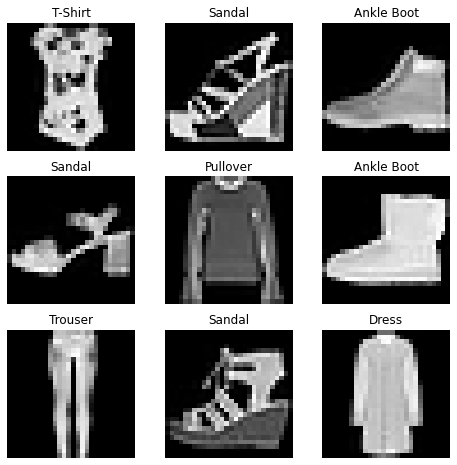

In [24]:
# Iterating and visualizing the dataset

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [25]:
#

import os
import pandas as pd
import torchvision.io as tvio

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = tvio.read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample 

In [26]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


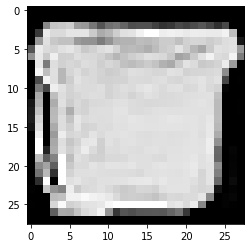

Label: 8


In [36]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [40]:

from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [41]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

In [48]:
torch.version.cuda
torch.__version__

'1.9.0'

# Build a neural network

Neural networks comprise of layers/modules that perform operations on data. 
The [torch.nn](https://pytorch.org/docs/stable/nn.html) namespace provides all the building blocks you need to 
build your own neural network. Every module in PyTorch subclasses the [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). 
A neural network is a module itself that consists of other modules (layers). This nested structure allows for
building and managing complex architectures easily.

In the following sections, we'll build a neural network to classify images in the FashionMNIST dataset.

In [49]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [50]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [52]:
?nn.Module

Init signature: nn.Module()
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.
:vartype training: bool
Init docstring: Initializes internal Module state, shared by both nn.Module and ScriptModule.
File:       

In [53]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [55]:
?super

Init signature: super(self, /, *args, **kwargs)
Docstring:     
super() -> same as super(__class__, <first argument>)
super(type) -> unbound super object
super(type, obj) -> bound super object; requires isinstance(obj, type)
super(type, type2) -> bound super object; requires issubclass(type2, type)
Typical use to call a cooperative superclass method:
class C(B):
    def meth(self, arg):
        super().meth(arg)
This works for class methods too:
class C(B):
    @classmethod
    def cmeth(cls, arg):
        super().cmeth(arg)
Type:           type
Subclasses:     


In [67]:
class B():
    def majid():
        print("hi there!")
class C(B):
    def meth(self, arg):
        super().meth(arg)

dir(C)
C.majid()

hi there!


### We create an instance of `NeuralNetwork`, and move it to the `device`, and print it's structure.

In [72]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


To use the model, we pass it the input data. This executes the model's `forward`,
along with some [background operations](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866). 
Do not call `model.forward()` directly!

Calling the model on the input returns a 10-dimensional tensor with raw predicted values for each class.
We get the prediction densities by passing it through an instance of the `nn.Softmax` module.

In [83]:

X = torch.rand(1, 28, 28, device=device)
logits = model(X) 
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")


Predicted class: tensor([9])


# Model layers

In [86]:

# we will take a sample minibatch of 3 images of size 28x28 

input_image = torch.rand(3,28,28)
print(input_image.size())


torch.Size([3, 28, 28])


In [88]:
# We initialize the nn.Flatten layer to convert each 2D 28x28 image 
# into a contiguous array of 784 pixel values

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())


torch.Size([3, 784])


In [96]:
# nn.Linear
# The linear layer is a module that applies a linear transformation on 
# the input using it's stored weights and biases.

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [97]:
# nn.ReLU
# Non-linear activations are what create the complex mappings between 
# the model's inputs and outputs. They are applied after linear transformations
# to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 3.8501e-01, -3.3355e-01, -3.7830e-02,  4.4990e-02, -3.2397e-01,
         -3.8141e-01,  1.1265e-02,  1.9798e-01, -1.5710e-01, -7.0600e-02,
          7.6189e-02, -3.2096e-01, -3.3638e-01, -5.1823e-01, -4.4312e-01,
          6.9224e-01,  3.0445e-01, -1.8482e-01, -4.0993e-01, -3.9287e-01],
        [ 3.3666e-01, -3.6540e-01,  3.9680e-01, -1.7356e-01, -3.2376e-01,
         -3.3196e-01, -1.4659e-01,  1.0838e-01,  1.7612e-01,  2.7989e-01,
         -5.1084e-02,  5.2136e-02,  1.5525e-01, -4.3174e-01, -6.7560e-01,
          2.8822e-01,  1.5087e-01, -2.0024e-01, -4.0359e-01,  1.4058e-04],
        [ 3.8662e-01, -4.8456e-01,  3.8124e-01, -3.4268e-01, -2.0448e-01,
         -1.4164e-01,  2.9786e-01,  1.7695e-01,  1.3110e-01, -6.6017e-02,
          1.2636e-01, -1.9632e-01, -2.1053e-01, -1.9311e-01, -4.2010e-01,
          2.8669e-01,  6.3609e-01, -1.5324e-01, -2.9551e-01, -2.1557e-01]],
       grad_fn=<AddmmBackward>)


After ReLU: tensor([[3.8501e-01, 0.0000e+00, 0.0000e+00, 4.49

### nn.Sequential

[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) is an ordered 
container of modules. The data is passed through all the modules in the same order as defined. You can use
sequential containers to put together a quick network like `seq_modules`.



In [104]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
logits

tensor([[-0.0109,  0.0710, -0.3522, -0.0655, -0.1857,  0.1030, -0.1556,  0.0048,
         -0.0123,  0.1587],
        [-0.1281,  0.1170, -0.3526, -0.0302, -0.1630,  0.0336, -0.0521,  0.0610,
          0.1026,  0.3190],
        [-0.1087,  0.0519, -0.3391,  0.0683, -0.1937,  0.0080, -0.1234, -0.1473,
          0.0633,  0.2339]], grad_fn=<AddmmBackward>)